<a href="https://colab.research.google.com/github/OzyMeister/NirfProject/blob/main/rankpred_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
+-import pandas as pd

In [ ]:
data=pd.read_csv("sample.csv")

In [ ]:
data

,a,b,c,d,e,Y
0,1.0,1.0,1.0,1.0,1.0,1
1,4.0,3.0,2.0,2.0,2.0,2
2,2.0,2.0,3.0,3.0,3.0,3
3,5.0,5.0,5.0,4.0,4.0,4
4,3.0,4.0,4.0,5.0,5.0,5
...,...,...,...,...,...,...
178,NaN,NaN,NaN,NaN,194.0,195
179,NaN,NaN,159.0,136.0,180.0,196
180,NaN,NaN,195.0,NaN,NaN,197
181,NaN,NaN,176.0,NaN,NaN,198


In [ ]:
df = data.fillna(0)
df

,a,b,c,d,e,Y
0,1.0,1.0,1.0,1.0,1.0,1
1,4.0,3.0,2.0,2.0,2.0,2
2,2.0,2.0,3.0,3.0,3.0,3
3,5.0,5.0,5.0,4.0,4.0,4
4,3.0,4.0,4.0,5.0,5.0,5
...,...,...,...,...,...,...
178,0.0,0.0,0.0,0.0,194.0,195
179,0.0,0.0,159.0,136.0,180.0,196
180,0.0,0.0,195.0,0.0,0.0,197
181,0.0,0.0,176.0,0.0,0.0,198


In [ ]:
data

,a,b,c,d,e,Y
0,1.0,1.0,1.0,1.0,1.0,1
1,4.0,3.0,2.0,2.0,2.0,2
2,2.0,2.0,3.0,3.0,3.0,3
3,5.0,5.0,5.0,4.0,4.0,4
4,3.0,4.0,4.0,5.0,5.0,5
...,...,...,...,...,...,...
178,NaN,NaN,NaN,NaN,194.0,195
179,NaN,NaN,159.0,136.0,180.0,196
180,NaN,NaN,195.0,NaN,NaN,197
181,NaN,NaN,176.0,NaN,NaN,198


In [ ]:
for i in range(183): 
  cnt=0
  if(df._get_value(i,'a')!=0):
    cnt+=1
  if(df._get_value(i,'b')!=0):
    cnt+=1
  if(df._get_value(i,'c')!=0):
    cnt+=1
  if(df._get_value(i,'d')!=0):
    cnt+=1
  if(df._get_value(i,'e')!=0):
    cnt+=1
  
  

  new=(df._get_value(i,'a')+df._get_value(i,'b')+df._get_value(i,'c')+df._get_value(i,'d')+df._get_value(i,'e'))/cnt
  data.loc[i] = data.loc[i].fillna(new)

In [ ]:
df

,a,b,c,d,e,Y
0,1.0,1.0,1.0,1.0,1.0,1
1,4.0,3.0,2.0,2.0,2.0,2
2,2.0,2.0,3.0,3.0,3.0,3
3,5.0,5.0,5.0,4.0,4.0,4
4,3.0,4.0,4.0,5.0,5.0,5
...,...,...,...,...,...,...
178,0.0,0.0,0.0,0.0,194.0,195
179,0.0,0.0,159.0,136.0,180.0,196
180,0.0,0.0,195.0,0.0,0.0,197
181,0.0,0.0,176.0,0.0,0.0,198


In [ ]:
frames = [data, data, data, data, data, data, data, data] #8x oversampling for knn
data = pd.concat(frames)

In [ ]:
data

,a,b,c,d,e,Y
0,1.000000,1.000000,1.0,1.0,1.0,1
1,4.000000,3.000000,2.0,2.0,2.0,2
2,2.000000,2.000000,3.0,3.0,3.0,3
3,5.000000,5.000000,5.0,4.0,4.0,4
4,3.000000,4.000000,4.0,5.0,5.0,5
...,...,...,...,...,...,...
178,194.000000,194.000000,194.0,194.0,194.0,195
179,158.333333,158.333333,159.0,136.0,180.0,196
180,195.000000,195.000000,195.0,195.0,195.0,197
181,176.000000,176.000000,176.0,176.0,176.0,198


In [ ]:
x=data.drop(['Y'],axis=1).values
y=data['Y'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)

In [ ]:
# from sklearn.linear_model import LinearRegression
# ml=LinearRegression()
# ml.fit(x_train,y_train)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x_train,y_train)
neigh.score(x_test,y_test)

0.9982703366428449

In [ ]:
y_pred=neigh.predict(x_test)
print(y_pred)

[ 45. 123.  24.  38. 164.  84.  23.  75. 117.  84. 160. 193. 158. 193.
 156.  97.  14.  36. 125. 134. 163. 124.  97. 160.   1. 106.  95.   7.
 152. 147. 178. 147.  18. 145.  58.  15. 104.  54. 167.  78. 105.  84.
 113.  31.  86. 127.  54.  17.  12.  60.  17.  70.  55.  51.  94. 105.
  85. 157. 108. 116.  39. 149. 138.  19. 125.  75.  75. 170.  45.  48.
   5.  20. 125.  69. 131.  91.  16.  49.  94.  54. 111. 118.  74. 178.
 177. 149. 124.  83. 117. 127. 156. 149.  15.  39.  62. 179.  80.  12.
  11.  79.  49. 147. 111.  41.  52.  20.  60.  92.  63. 198.  89.  87.
 163. 150. 141.   4. 177. 115.  48.  51.  99.  65.  90.  38.  77. 119.
 135.  50.  93.  87. 198. 108.  46.  41. 197. 166. 101.  35.   6. 149.
  88. 177.  45.  17.  52.   9. 112. 149. 131. 110.  31.  21.  49.  54.
  63.  93.  43. 154. 193.  97.  66. 164.  91.  19. 154. 184.  36. 177.
  54. 164. 105.  72. 179.  92. 101. 182. 166. 180.  35.  23. 175.  10.
  17.  97. 100. 177. 140. 152.  90.  93.  27. 167.  36.  67. 119. 135.
  28. 

In [ ]:
lst = []  
for i in range(0, 5):
    print('Enter Rank for year ' + str(i+1))
    ele = int(input())  
    lst.append(ele)      
print("Previous Ranks : " ,lst)
out = [round(item) for item in neigh.predict([lst])]
print("Predicted Rank : " ,out)

Enter Rank for year 1
88
Enter Rank for year 2
95
Enter Rank for year 3
105
Enter Rank for year 4
71
Enter Rank for year 5
82
Previous Ranks :  [88, 95, 105, 71, 82]
Predicted Rank :  [119]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9982703366428449

Text(0.5, 1.0, 'Actual vs Predicted')

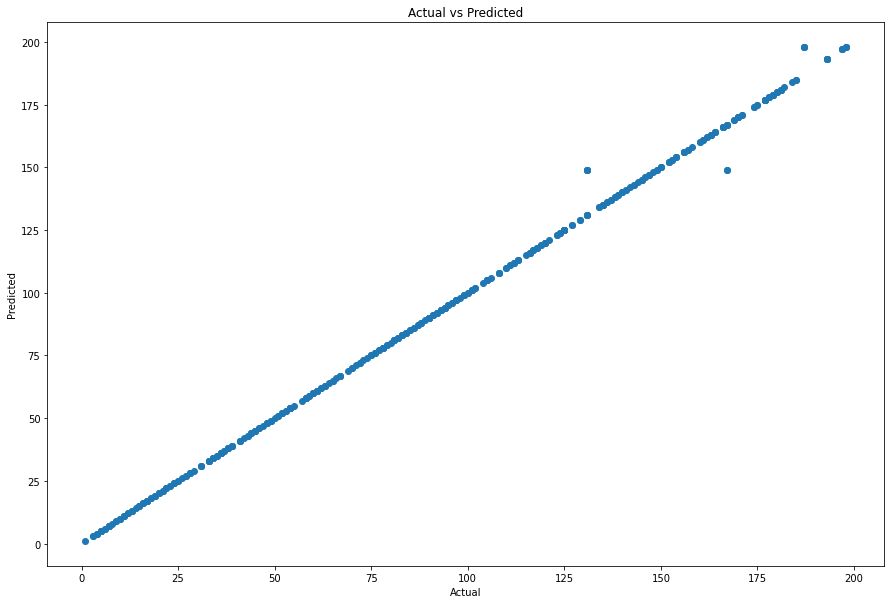

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [ ]:
# ml.score(x_test,y_test)

In [ ]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(ml,x_train,y_train,scoring='r2', cv=5)
# scores

In [ ]:
# from sklearn.linear_model import Ridge
# rr=Ridge()
# rr.fit(x_train,y_train)
# rr.score(x_test,y_test)

In [ ]:
# from sklearn.neighbors import KNeighborsRegressor
# neigh = KNeighborsRegressor(n_neighbors=2)
# neigh.fit(x_train,y_train)
# neigh.score(x_test,y_test)

In [ ]:
# from sklearn.svm import SVR
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# n_samples, n_features = 10, 5
# rng = np.random.RandomState(0)
# y = rng.randn(n_samples)
# X = rng.randn(n_samples, n_features)
# sregr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
# sregr.fit(x_train,y_train)
# sregr.score(x_test,y_test)

In [ ]:
# from sklearn import linear_model
# clf = linear_model.Lasso(alpha=0.1)
# clf.fit(x_train,y_train)
# clf.score(x_test,y_test)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# regr = RandomForestRegressor(max_depth=2, random_state=0)
# regr.fit(x_train,y_train)
# regr.score(x_test,y_test)

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# regressor = DecisionTreeRegressor(random_state=0)
# regressor.fit(x_train,y_train)
# regressor.score(x_test,y_test)